<a href="https://colab.research.google.com/github/kgoldra/capstone_Xplisit/blob/main/ML/main22v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.utils import class_weight
from google.colab import files
from keras.models import load_model



In [2]:
try:
  shutil.rmtree('/content/nail diseases')
  shutil.rmtree('/content/Data')
except:
  pass

In [3]:
path_nails = f"/content/nail diseases.zip"

local_zip = path_nails
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:

ORIGINDIR = "/content/nail diseases"
DATADIR = "/content/Data"
TRAINORTEST = ["training", "testing"]
CATEGORIES = ["aloperia areata", 
              "beau's lines", 
              "bluish nail", 
              "clubbing", 
              "darier's disease", 
              "eczema", 
              "koilonychia", 
              "leukonychia", 
              "lindsay's nails", 
              "muehrck-e's lines", 
              "normal", 
              "onycholycis", 
              "pale nail", 
              "splinter hemmorrage", 
              "terry's nail"]

In [5]:
counter = 0

for trainortest in TRAINORTEST:
  path = os.path.join(DATADIR, trainortest)
  for category in CATEGORIES:
    counter += 1
    originpath = os.path.join(ORIGINDIR, category)
    path2 = os.path.join(path, category)
    if(counter) <= 14:
      print(category, "Datasets Has: ", len(os.listdir(originpath)) ,"Data")
    os.makedirs(path2)
    pass

aloperia areata Datasets Has:  43 Data
beau's lines Datasets Has:  38 Data
bluish nail Datasets Has:  40 Data
clubbing Datasets Has:  37 Data
darier's disease Datasets Has:  44 Data
eczema Datasets Has:  42 Data
koilonychia Datasets Has:  36 Data
leukonychia Datasets Has:  30 Data
lindsay's nails Datasets Has:  36 Data
muehrck-e's lines Datasets Has:  32 Data
normal Datasets Has:  49 Data
onycholycis Datasets Has:  47 Data
pale nail Datasets Has:  33 Data
splinter hemmorrage Datasets Has:  40 Data


In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_sets = int(len(files) * SPLIT_SIZE)
    testing_sets = int(len(files) - training_sets)
    randomed = random.sample(files,len(files))
    training_files = randomed[0:training_sets]
    testing_files = randomed[:testing_sets]
    
    for filename in training_files:
        source = SOURCE + filename
        destination = TRAINING + filename
        copyfile(source, destination)
        
    for filename in testing_files:
        source = SOURCE + filename
        destination = TESTING + filename
        copyfile(source, destination)

In [7]:
normal_DIR = "/content/nail diseases/normal/"
TRAINING_normal_DIR = "/content/Data/training/normal/"
TESTING_normal_DIR = "/content/Data/testing/normal/"

aloperia_DIR = "/content/nail diseases/aloperia areata/"
TRAINING_aloperia_DIR = "/content/Data/training/aloperia areata/"
TESTING_aloperia_DIR = "/content/Data/testing/aloperia areata/"

beau_DIR = "/content/nail diseases/beau's lines/"
TRAINING_beau_DIR = "/content/Data/training/beau's lines/"
TESTING_beau_DIR = "/content/Data/testing/beau's lines/"

bluish_DIR = "/content/nail diseases/bluish nail/"
TRAINING_bluish_DIR = "/content/Data/training/bluish nail/"
TESTING_bluish_DIR = "/content/Data/testing/bluish nail/"

clubbing_DIR = "/content/nail diseases/clubbing/"
TRAINING_clubbing_DIR = "/content/Data/training/clubbing/"
TESTING_clubbing_DIR = "/content/Data/testing/clubbing/"

Darier_DIR = "/content/nail diseases/darier's disease/"
TRAINING_Darier_DIR = "/content/Data/training/darier's disease/"
TESTING_Darier_DIR = "/content/Data/testing/darier's disease/"

eczema_DIR = "/content/nail diseases/eczema/"
TRAINING_eczema_DIR = "/content/Data/training/eczema/"
TESTING_eczema_DIR = "/content/Data/testing/eczema/"

koilonychia_DIR = "/content/nail diseases/koilonychia/"
TRAINING_koilonychia_DIR = "/content/Data/training/koilonychia/"
TESTING_koilonychia_DIR = "/content/Data/testing/koilonychia/"

leukonychia_DIR = "/content/nail diseases/leukonychia/"
TRAINING_leukonychia_DIR = "/content/Data/training/leukonychia/"
TESTING_leukonychia_DIR = "/content/Data/testing/leukonychia/"

lindsay_DIR = "/content/nail diseases/lindsay's nails/"
TRAINING_lindsay_DIR = "/content/Data/training/lindsay's nails/"
TESTING_lindsay_DIR = "/content/Data/testing/lindsay's nails/"

Muehrck_DIR = "/content/nail diseases/muehrck-e's lines/"
TRAINING_Muehrck_DIR = "/content/Data/training/muehrck-e's lines/"
TESTING_Muehrck_DIR = "/content/Data/testing/muehrck-e's lines/"

onycholycis_DIR = "/content/nail diseases/onycholycis/"
TRAINING_onycholycis_DIR = "/content/Data/training/onycholycis/"
TESTING_onycholycis_DIR = "/content/Data/testing/onycholycis/"

pale_nail_DIR = "/content/nail diseases/pale nail/"
TRAINING_pale_nail_DIR = "/content/Data/training/pale nail/"
TESTING_pale_nail_DIR = "/content/Data/testing/pale nail/"

splinter_hemmorrage_DIR = "/content/nail diseases/splinter hemmorrage/"
TRAINING_splinter_hemmorrage_DIR = "/content/Data/training/splinter hemmorrage/"
TESTING_splinter_hemmorrage_DIR = "/content/Data/testing/splinter hemmorrage/"

terry_DIR = "/content/nail diseases/terry's nail/"
TRAINING_terry_DIR = "/content/Data/training/terry's nail/"
TESTING_terry_DIR = "/content/Data/testing/terry's nail/"


split_size = .75




split_data(Darier_DIR, TRAINING_Darier_DIR, TESTING_Darier_DIR, split_size)
split_data(Muehrck_DIR, TRAINING_Muehrck_DIR, TESTING_Muehrck_DIR, split_size)
split_data(aloperia_DIR, TRAINING_aloperia_DIR, TESTING_aloperia_DIR, split_size)
split_data(beau_DIR, TRAINING_beau_DIR, TESTING_beau_DIR, split_size)
split_data(bluish_DIR, TRAINING_bluish_DIR, TESTING_bluish_DIR, split_size)
split_data(clubbing_DIR, TRAINING_clubbing_DIR, TESTING_clubbing_DIR, split_size)
split_data(eczema_DIR, TRAINING_eczema_DIR, TESTING_eczema_DIR, split_size)
split_data(koilonychia_DIR, TRAINING_koilonychia_DIR, TESTING_koilonychia_DIR, split_size)
split_data(leukonychia_DIR, TRAINING_leukonychia_DIR, TESTING_leukonychia_DIR, split_size)
split_data(lindsay_DIR, TRAINING_lindsay_DIR, TESTING_lindsay_DIR, split_size)
split_data(onycholycis_DIR, TRAINING_onycholycis_DIR, TESTING_onycholycis_DIR, split_size)
split_data(pale_nail_DIR, TRAINING_pale_nail_DIR, TESTING_pale_nail_DIR, split_size)
split_data(splinter_hemmorrage_DIR, TRAINING_splinter_hemmorrage_DIR, TESTING_splinter_hemmorrage_DIR, split_size)
split_data(terry_DIR, TRAINING_terry_DIR, TESTING_terry_DIR, split_size)
split_data(normal_DIR, TRAINING_normal_DIR, TESTING_normal_DIR, split_size)

In [8]:
print(len(os.listdir("/content/Data/testing/normal")))
print(len(os.listdir("/content/Data/training/normal")))

13
36


In [9]:
IMGSIZE = 150

In [10]:
training_data = []

def create_training_data():
  path = os.path.join(DATADIR, "training")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      training_data.append([new_array, class_label])

create_training_data()

In [11]:
testing_data = []

def create_testing_data():
  path = os.path.join(DATADIR, "testing")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      testing_data.append([new_array, class_label])

create_testing_data()

In [12]:
X = []
x_label = []
y = []
y_label = []

for features, label in training_data:
  X.append(features)
  x_label.append(label)

  
for features, label in testing_data:
  y.append(features)
  y_label.append(label)


In [13]:
weight = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y)),
                                                 np.ravel(y))

In [14]:
weights = {i : weight[i] for i in range(18)}

print (weight)

[2.48747052 2.12856042 1.98428563 1.20354151 0.80540007 0.97627323
 1.04659384 0.90372866 0.98691906 1.37262377 1.67573855 1.95592608
 2.1281023  2.08129144 2.09374173 2.37570767 2.58552535 2.66120181
 2.77374158 2.81560342 3.09570924 3.28549437 3.26299656 3.27596962
 3.60963596 3.7425039  3.92758503 3.91281967 3.76925391 3.61722894
 3.43024989 3.28113334 3.15648693 3.14369138 3.00355265 2.93490511
 2.86496061 2.50940811 2.73253981 2.69291082 2.67650952 2.56207691
 2.42034032 2.36349834 2.26808013 2.27761481 2.20880047 2.172523
 2.17718712 2.12023058 2.0527732  1.99027683 1.88131005 1.82936083
 1.75648538 1.75104181 1.72861806 1.68638474 1.64104316 1.62887777
 1.60468947 1.5936329  1.53339205 1.47533502 1.40345556 1.38207294
 1.36891808 1.34412171 1.31341219 1.27669651 1.23530566 1.22996583
 1.22429287 1.21388439 1.18504213 1.18062034 1.13083006 1.09571092
 1.09223112 1.0668352  1.04007104 1.0413307  1.00627878 0.98231084
 0.97367753 0.93100092 0.91072076 0.91109839 0.88932119 0.884251

In [15]:
X = np.array(X).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
y = np.array(y).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
x_label = np.array(x_label).astype('float')
y_label = np.array(y_label).astype('float')

print(X.shape)
print(y.shape)
print(x_label.shape)
print(y_label.shape)

(431, 150, 150, 3)
(150, 150, 150, 3)
(431,)
(150,)


In [16]:
print(weights)

{0: 2.4874705188679247, 1: 2.1285604246273073, 2: 1.984285633654425, 3: 1.2035415145152455, 4: 0.8054000702547498, 5: 0.9762732338566351, 6: 1.0465938409632178, 7: 0.9037286639703866, 8: 0.9869190580162196, 9: 1.3726237679600195, 10: 1.6757385496991781, 11: 1.9559260793234756, 12: 2.128102300242131, 13: 2.081291440825133, 14: 2.0937417284277395, 15: 2.3757076675876982, 16: 2.5855253481074723, 17: 2.6612018066209124}


In [17]:
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
    rescale = 1./255.,
)

In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [19]:
train_generator = training_datagen.flow(
    X,
    x_label,
    batch_size = 32
)

validation_generator = validation_datagen.flow(
    y,
    y_label,
    batch_size = 32
)

In [20]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>=90):
                print("\nReached 90% Accuracy so cancelling training!")
                self.model.stop_training = True

In [21]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [22]:
callbacks=myCallback()

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adamax', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch = 431/32,
    validation_data = validation_generator,
    validation_steps = 150/32,
    epochs = 350, callbacks = [callbacks]
)


model.save('model.h5')
files.download('model.h5')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

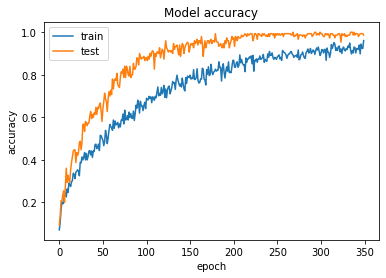

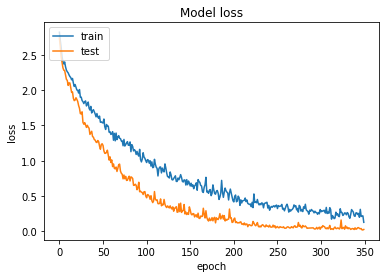

In [23]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_train_history(history)

In [24]:
test_label = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
class_names = CATEGORIES

In [25]:
files = []
SOURCE = '/content/nail diseases/test/'
for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
        files.append(filename)
    else:
        print(filename + " is zero length, so ignoring.")

normal 1.png


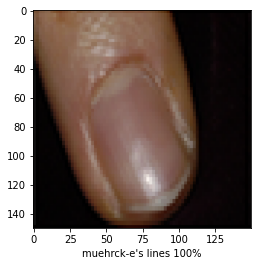

normal 7.png


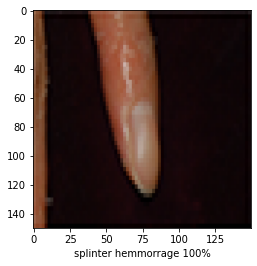

koilonychia 1.PNG


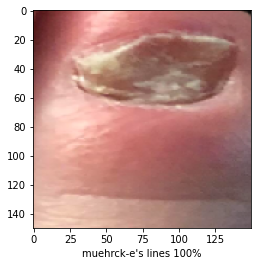

normal 11.png


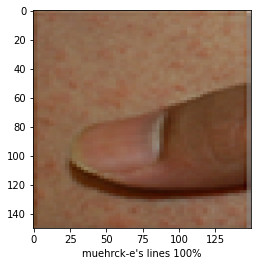

splinter 6.PNG


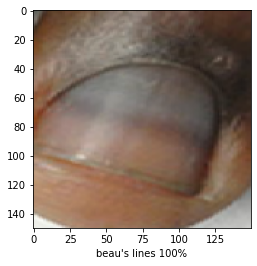

normal 16.png


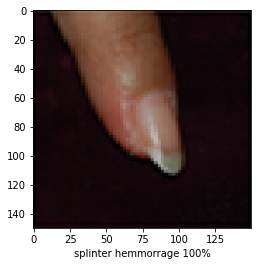

eczema 1.PNG


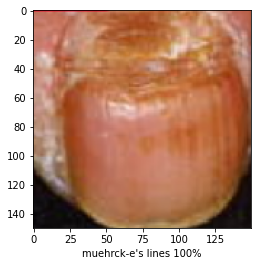

lindsay 2.PNG


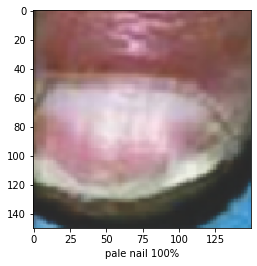

darier 3.PNG


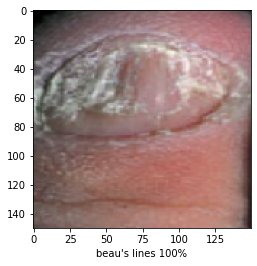

terry 2.PNG


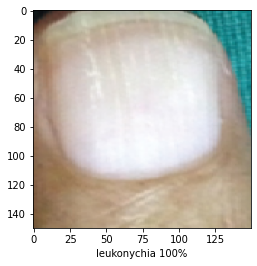

normal 6.png


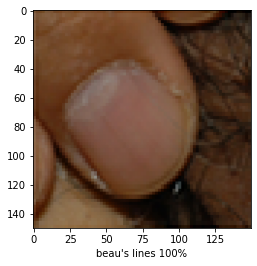

Beau 3.PNG


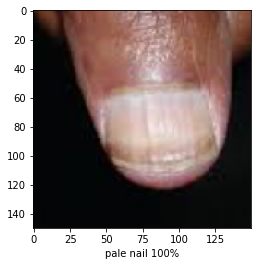

aloperia 2.PNG


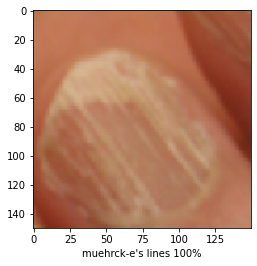

normal 18.png


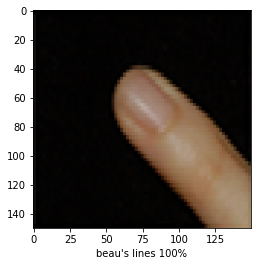

eczema 2.PNG


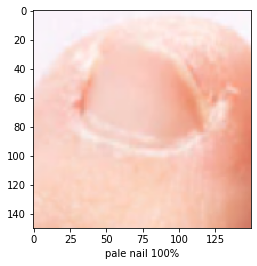

lindsay 1.PNG


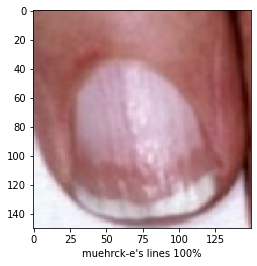

splinter 1.PNG


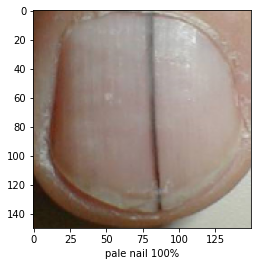

darier 2.PNG


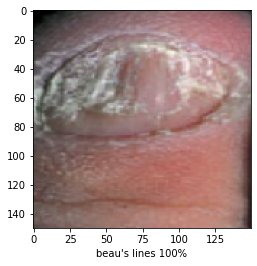

pale nail 1.PNG


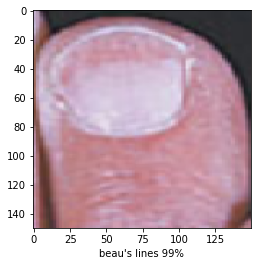

onycholycis 1.PNG


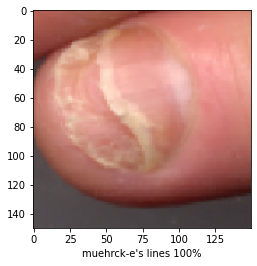

normal 13.png


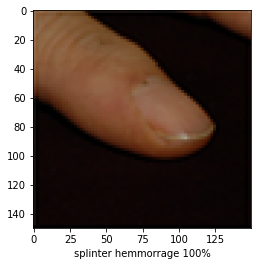

splinter 5.PNG


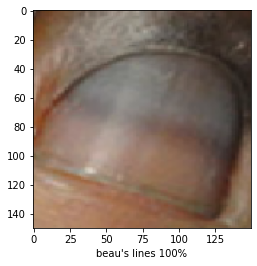

clubbing 2.PNG


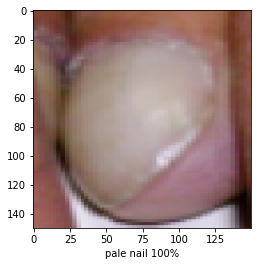

normal 19.png


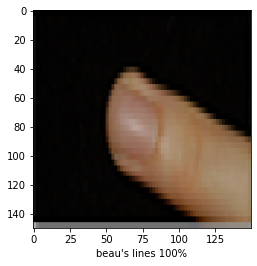

eczema 3.PNG


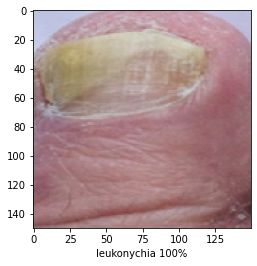

clubbing 1.PNG


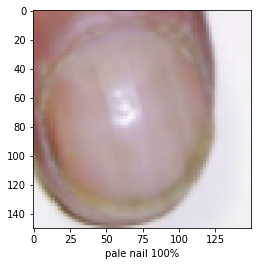

onycholycis 2.PNG


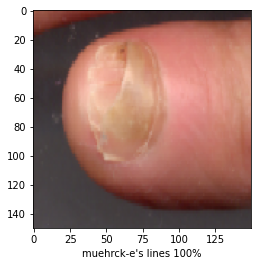

bluish 2.PNG


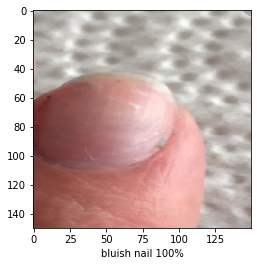

muehrck 1.PNG


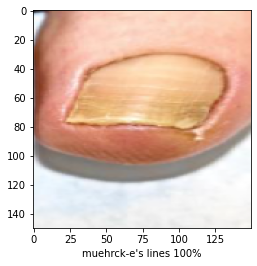

normal 2.png


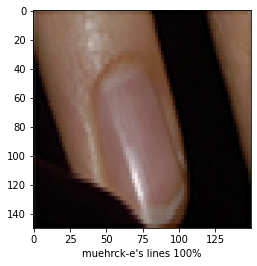

test.jpg


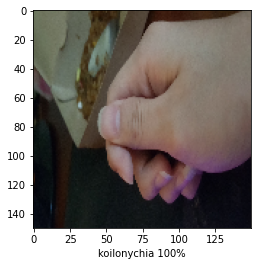

onycholycis 3.PNG


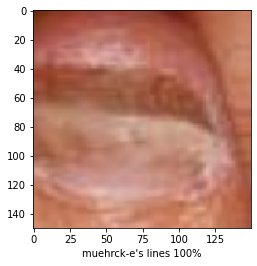

koilonychia 2.PNG


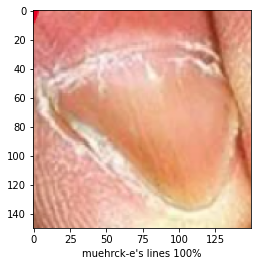

normal 4.png


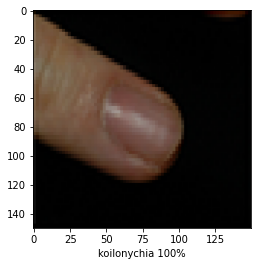

normal 17.png


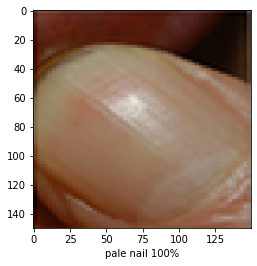

splinter 2.PNG


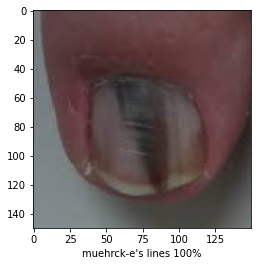

normal 8.png


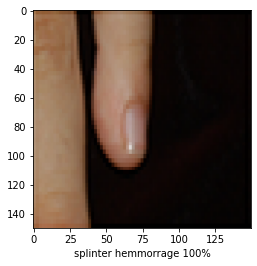

bluish 3.PNG


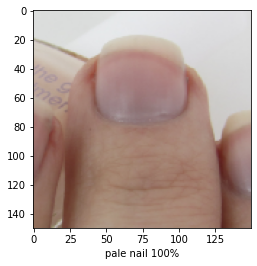

normal 12.png


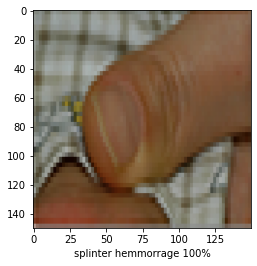

aloperia 4.PNG


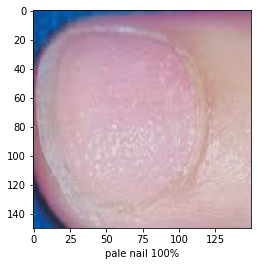

aloperia 1.PNG


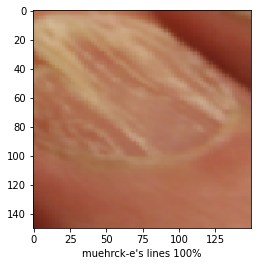

darier1.PNG


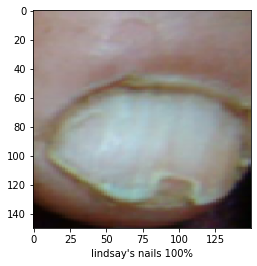

aloperia 3.PNG


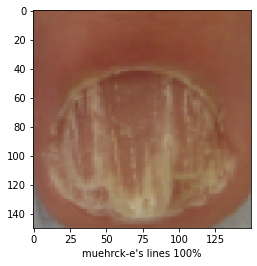

splinter 3.PNG


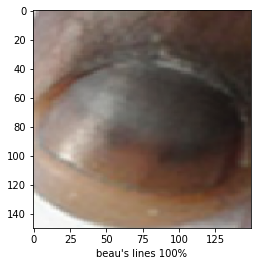

splinter 4.PNG


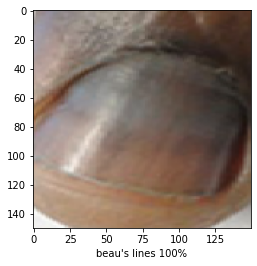

beau 4.png


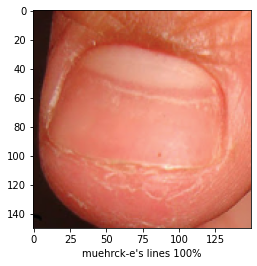

bluish 1.PNG


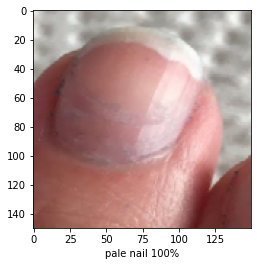

test 2.jpg


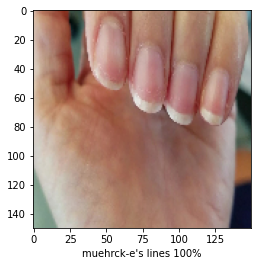

clubbing 3.PNG


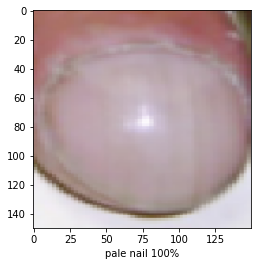

leukonychia 1.PNG


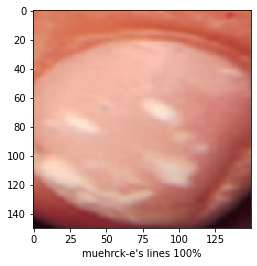

normal 9.png


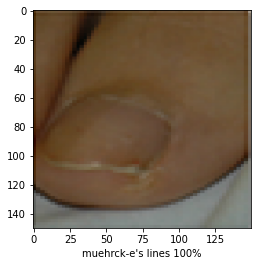

normal 14.png


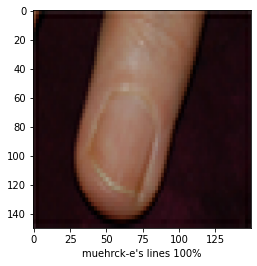

Beau 2.PNG


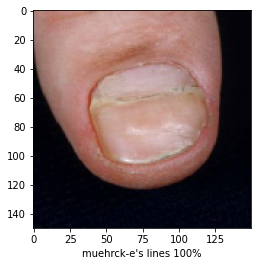

normal 5.png


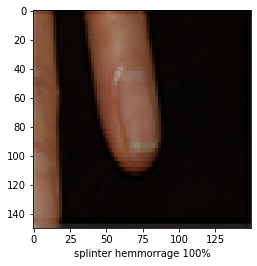

normal 15.png


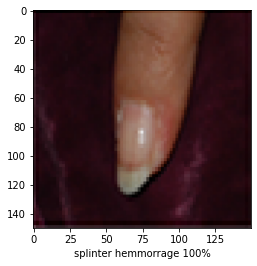

Beau 1.PNG


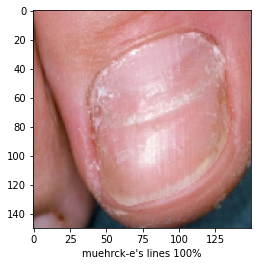

terry 1.PNG


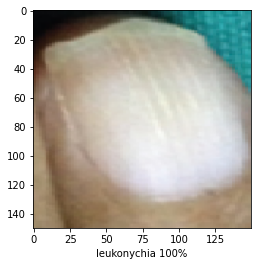

normal 10.png


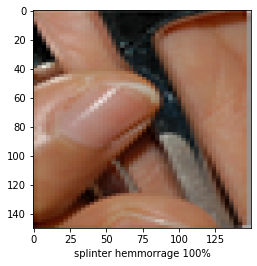

pale nail 2.PNG


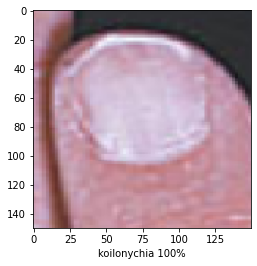

normal 3.png


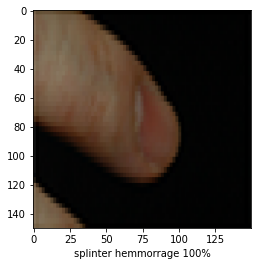

In [26]:
for file in files:
  path = SOURCE + file
  img = image.load_img(path, target_size=(150, 150))
  xy = image.img_to_array(img)
  xy = np.expand_dims(xy, axis=0)
  images = np.vstack([xy])
  predictions = model.predict(images, batch_size=32)


  print(file)
  imgplot = plt.imshow(img)
  plt.xlabel("{} {:2.0f}%".format(CATEGORIES[np.argmax(predictions)],
                             100*np.max(predictions)))
  plt.show()

  

In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="nailss.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('nailss.tflite', 'wb') as f:
  f.write(tflite_model)

# **Don't Run**

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives / (possible_positives + K.epsilon()))
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives / (predicted_positives + K.epsilon()))
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
for fn in uploaded.keys():
  predictions = model.predict([preparation(fn)])
  img = image.load_img(fn, target_size=(150, 150))
  img = np.array(img)
  img = img/255.
  xy = img
  xy = np.expand_dims(img, axis=0)
  
  imgplot = plt.imshow(img)
  plt.show()

  print(fn)
  print(predictions)
  print(xy.shape)